## This notebook separates the labeled training data into two parts, each with class labels, for rapid testing and evaluation. Reports evaluation metrics at the end of the notebook

In [1]:
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

# Set the randomizer seed so results are the same each time
np.random.seed(1)

In [2]:
# import training data from relative filepath
data = pd.read_csv("../../data/train.csv")

# shuffles the data by taking a random sample without replacement
# and sampling 100% of the original dataframe
data = data.sample(frac = 1)

print("The entire training set is " + str(len(data)) + " so, with 80% for training, there will " +
     "be " + str(len(data)*0.8) + " samples in training and " + str(len(data)*0.2) + " samples " +
     "in the test.")
data.head()

The entire training set is 15120 so, with 80% for training, there will be 12096.0 samples in training and 3024.0 samples in the test.


,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
5765,5766,2489,333,18,124,39,458,176,214,176,...,0,0,0,0,0,0,0,0,0,6
11340,11341,2696,4,13,30,10,2800,202,214,148,...,0,0,0,0,0,0,0,0,0,1
9270,9271,3413,140,17,134,6,4271,243,233,113,...,0,0,0,0,0,0,0,0,0,7
5710,5711,2874,116,18,153,17,2379,248,220,94,...,0,0,0,0,0,0,0,0,0,5
1070,1071,3001,57,18,180,28,4673,229,200,97,...,0,0,0,0,0,0,0,0,0,1


In [3]:
# extract random sample of training data except labels and ID column
train_df = data.loc[:, (data.columns != "Cover_Type") & (data.columns != "Id")].iloc[:12096]

# extract labels from training data
train_labels_df = data.iloc[:12096].loc[:, "Cover_Type"]

train_df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
5765,2489,333,18,124,39,458,176,214,176,1409,...,0,0,0,0,0,0,0,0,0,0
11340,2696,4,13,30,10,2800,202,214,148,6524,...,0,0,0,0,0,0,0,0,0,0
9270,3413,140,17,134,6,4271,243,233,113,4272,...,0,0,0,0,0,0,0,0,0,0
5710,2874,116,18,153,17,2379,248,220,94,564,...,0,0,0,0,0,0,0,0,0,0
1070,3001,57,18,180,28,4673,229,200,97,1864,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# extract test data except ID and Cover_Type column
test_df = data.loc[:, (data.columns != "Cover_Type") & (data.columns != "Id")].iloc[12096:]

# extract labels data
test_labels_df = data.iloc[12096:].loc[:, "Cover_Type"]

test_df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
3970,2058,9,5,0,0,646,215,230,153,811,...,0,0,0,0,0,0,0,0,0,0
6060,2444,295,16,85,6,1165,172,234,201,234,...,0,0,0,0,0,0,0,0,0,0
13589,2751,237,16,190,56,939,191,252,196,1926,...,0,0,0,0,0,0,0,0,0,0
10193,2850,53,18,134,53,2186,227,197,97,2254,...,0,0,1,0,0,0,0,0,0,0
10745,2835,104,6,95,16,2093,230,233,136,1239,...,0,0,0,0,0,0,0,0,0,0


In [12]:
## Create current best classifier
hidden_layer_sizes = (100, 100, 100, 100, 100)

# build classifier
classifier = MLPClassifier(hidden_layer_sizes = hidden_layer_sizes, 
                           early_stopping = True, alpha = 0.0001)

# fit classifier to training data
classifier.fit(train_df, train_labels_df)

# make predictions of test data
predictions = classifier.predict(test_df)

              precision    recall  f1-score   support

           1       0.62      0.72      0.66       418
           2       0.71      0.45      0.55       430
           3       0.71      0.67      0.69       476
           4       0.85      0.95      0.90       392
           5       0.68      0.91      0.78       483
           6       0.74      0.60      0.66       414
           7       0.87      0.85      0.86       411

    accuracy                           0.73      3024
   macro avg       0.74      0.74      0.73      3024
weighted avg       0.74      0.73      0.73      3024



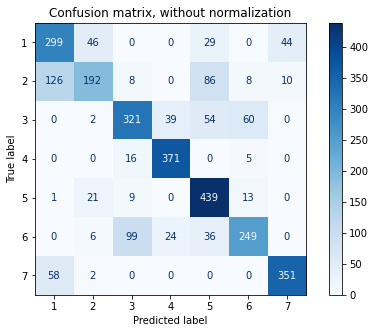

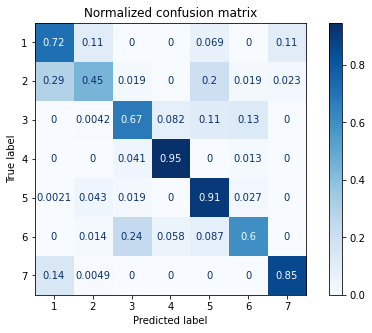

Overall accuracy: 73.47883597883597%


In [13]:
# generate and print classification report
print(classification_report(test_labels_df, predictions))

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, test_df, test_labels_df,
                                 display_labels= [str(number) for number in range(1, 8)],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
    fig = plt.gcf()
    fig.set_size_inches(8,5)

plt.show()

# calculate and print accuracy
print("Overall accuracy: " + 
      str(100*metrics.accuracy_score(test_labels_df, predictions)) + "%")

In [7]:
## Use grid search to evaluate parameters

# choose variables for grid search
parameters = {"activation": ["identity", "logistic", "tanh", "relu"]}

# build classifier
classifier = GridSearchCV(MLPClassifier(early_stopping = True), 
                          param_grid = parameters, cv = 10, 
                          scoring = "accuracy")

# fit classifier to training data
classifier.fit(train_df, train_labels_df)

# make predictions of test data
predictions = classifier.predict(test_df)

In [8]:
print("Best parameters = ", classifier.best_params_)

# calculate and print accuracy
print("Best accuracy: " + 
      str(100*metrics.accuracy_score(test_labels_df, predictions)) + "%")

Best parameters =  {'activation': 'logistic'}
Best accuracy: 66.4021164021164%


In [9]:
## Use manual loop to evaluate parameters

for activation in parameters["activation"]:
    
    # build classifier
    classifier = MLPClassifier(early_stopping = True, activation = activation)

    # fit classifier to training data
    classifier.fit(train_df, train_labels_df)

    # make predictions of test data
    predictions = classifier.predict(test_df)

    print("Activation: " + activation)
    # calculate and print accuracy
    print("Accuracy: " + 
      str(100*metrics.accuracy_score(test_labels_df, predictions)) + "%")

Activation: identity
Accuracy: 60.25132275132275%
Activation: logistic
Accuracy: 66.7989417989418%
Activation: tanh
Accuracy: 60.21825396825397%
Activation: relu
Accuracy: 63.35978835978836%
